# K-Means

## 聚类的概念

　　聚类分析仅根据在数据中发现的描述对象及其关系的信息，将数据对象分组。其目标是，组内的对象相互之间是相似的（相关的），而不同组中的对象是不同的（不相关的）。组内的相似性（同质性）越大，组间差别越大，聚类就越好。

K均值算法：　　

1. 选择K个点作为初始质心。
2. repeat：
3. 　　将每个点指派到最近的质心，形成K个簇。
4. 　　重新计算每个簇的质心。
5. until 质心不发生变化。

## 1. 二维点聚类

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

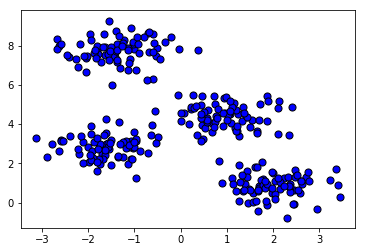

In [19]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], s=50, c='b', edgecolors='black')
plt.show()

In [20]:
from sklearn.cluster import KMeans

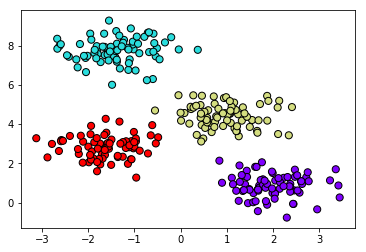

In [21]:
est = KMeans(4)
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, edgecolors='black', cmap='rainbow')
plt.show()

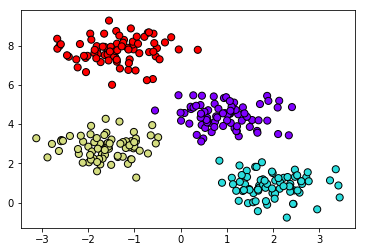

In [22]:
est = KMeans(4)
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='black', cmap='rainbow')
plt.show()

## 2. 手写字符聚类

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

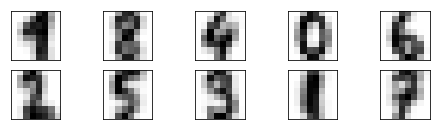

In [25]:
fig = plt.figure(figsize=(8,2))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape([8,8]), cmap=plt.cm.binary)
plt.show()

## 3. 图像压缩

In [26]:
from sklearn.datasets import load_sample_image

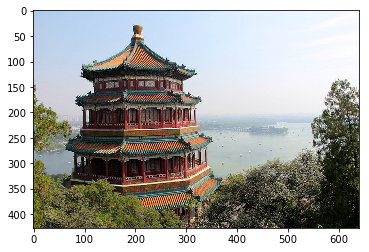

In [27]:
china = load_sample_image('china.jpg')
plt.imshow(china)
plt.grid(False)
plt.show()

In [28]:
china.shape

(427, 640, 3)

In [29]:
X = (china / 255.0).reshape(-1, 3)
X.shape

(273280, 3)

In [30]:
# reduce the size of the image for speed
image = china[::3, ::3]
print('shape:', image.shape)
n_colors = 64

X = (image / 255.0).reshape(-1, 3)

model = KMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

plt.figure()
plt.imshow(image)
plt.title('input')

plt.figure()
plt.imshow(new_image)
plt.title('{0} colors'.format(n_colors))

shape: (143, 214, 3)


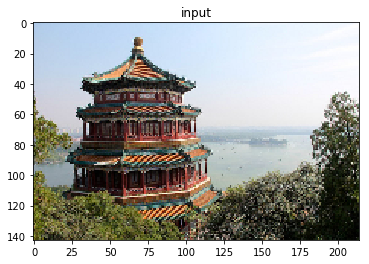

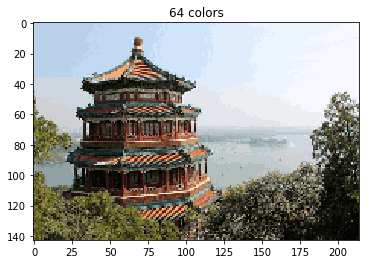

In [31]:
plt.show()